In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmaps
#cmap = cmaps.WhiteBlueGreenYellowRed

In [6]:
def draw_worldmap(data, vmin=0, vmax=0.1):
    projection = ccrs.PlateCarree(central_longitude=180)
    img_extent = (-180, 180, -90, 90)
    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    mat = ax.matshow(data,
                     origin='upper',
                     extent=img_extent,
                     transform=projection,
                     vmin=vmin, vmax=vmax,
                     cmap='WhiteBlueGreenYellowRed'
                    )
    cbar = fig.colorbar(mat,
                        ax=ax,
                        orientation='horizontal'
                       )
    plt.show()

In [20]:
def load_ndarray(filename='may_first_start_2017_2022_51ensembles',
                ):
    """
    ensembles: 25 or 51
    days: 215
    lats: 181
    lons: 360
    """
    dr = '/work/common/precipitation/ECMWF_forecast/ndarray/'
    path = dr + filename + '.npy'
    forecast = np.load(path)
    print(f'forecast.shape: {forecast.shape}')
    return forecast

In [8]:
forecast = load_ndarray(filename='may_first_start_1993_2016_215days_25ensembles')

forecast.shape: (25, 24, 215, 181, 360)


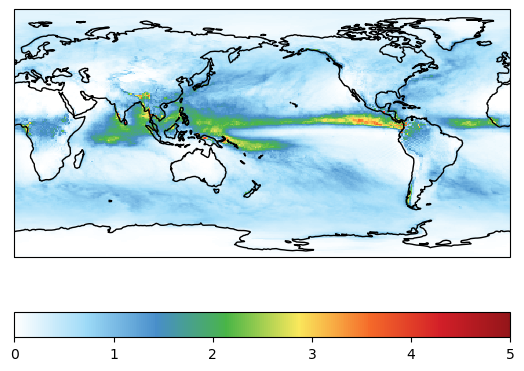

In [10]:
# check accumulation
sample = forecast[0, 0, 214, :, :]
draw_worldmap(sample, vmax=5)

In [28]:
def save_monthly_data(loadfname,
                      savefname='may_first_start_2017_2022_7months_51ensembles',
                      save_flag=False,
                      ):
    """
    ensembles: 1993-2016=25 or 2017-2022=51
    years = 24 or 6
    months = 7
    lats = 181
    lons = 360
    """
    # load data
    dr = '/work/common/precipitation/ECMWF_forecast/ndarray/'
    path = dr + loadfname + '.npy'
    daily = np.load(path)
    
    monthly_accum = daily[:, :, 30::30, :, :]
    monthly_separ = np.empty((monthly_accum.shape))
    print(monthly_separ.shape)
    
    monthly_separ[:, :, 0, :, :] = monthly_accum[:, :, 0, :, :]
    delta = [monthly_accum[:, :, i+1, :, :] - monthly_accum[:, :, i, :, :] for i in range(0, 6)]
    print(f"len(delta): {len(delta)}")
    
    for i in range(1, 7):
        monthly_separ[:, :, i, :, :] = delta[i-1]
    
    if save_flag is False:
        print(f"save_flag is {save_flag}")
    else:
        dr = '/work/kajiyama/preprocessed/ECMWF_forecast/main/'
        save_path = dr + savefname + '.npy'
        np.save(save_path, monthly_separ)
        print(f"{save_path} saved")

In [33]:
def load_monthly(filename='may_first_start_1993_2016_7months_25ensembles',
                ):
    """
    ensembles: 25 or 51
    months: 7
    lats: 181
    lons: 360
    """
    dr = '/work/kajiyama/preprocessed/ECMWF_forecast/main/'
    path = dr + filename + '.npy'
    monthly = np.load(path)
    print(f'monthly.shape: {monthly.shape}')
    return monthly

# check if everything correct in map

monthly.shape: (25, 24, 7, 181, 360)


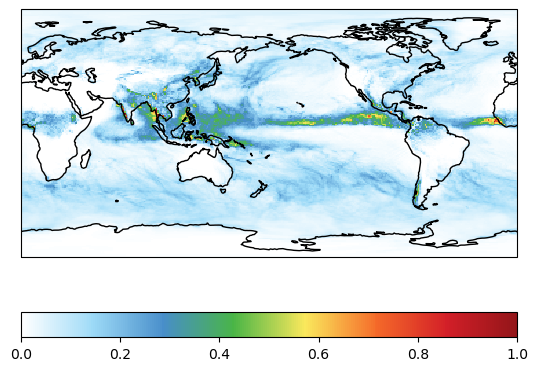

In [47]:
# prediction of july
monthly = load_monthly(filename='jan_first_start_1993_2016_7months_25ensembles')
sandbox = monthly[0, 0, 6, :, :]
draw_worldmap(sandbox, vmax=1)

monthly.shape: (25, 24, 7, 181, 360)


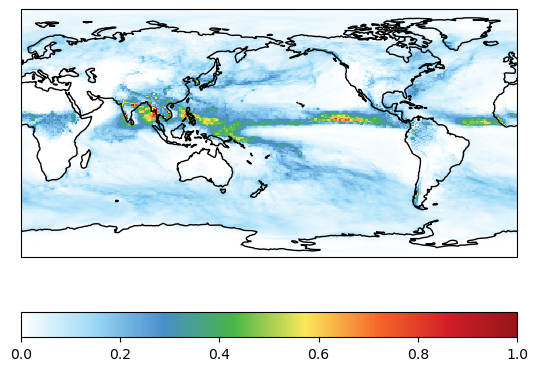

In [45]:
# prediction of august
monthly = load_monthly(filename='feb_first_start_1993_2016_7months_25ensembles')
sandbox = monthly[0, 0, 6, :, :]
draw_worldmap(sandbox, vmax=1)

# 計算一つ12分くらいかかる
# 130GBメモリ使うからnode2でのみ実行可能

In [31]:
save_monthly_data(loadfname='jan_first_start_1993_2016_215days_25ensembles',
                  savefname='jan_first_start_1993_2016_7months_25ensembles',
                  save_flag=True)

(25, 24, 7, 181, 360)
len(delta): 6
/work/kajiyama/preprocessed/ECMWF_forecast/main/jan_first_start_1993_2016_7months_25ensembles.npy saved


In [36]:
save_monthly_data(loadfname='feb_first_start_1993_2016_215days_25ensembles',
                  savefname='feb_first_start_1993_2016_7months_25ensembles',
                  save_flag=True)
save_monthly_data(loadfname='mar_first_start_1993_2016_215days_25ensembles',
                  savefname='mar_first_start_1993_2016_7months_25ensembles',
                  save_flag=True)
save_monthly_data(loadfname='apr_first_start_1993_2016_215days_25ensembles',
                  savefname='apr_first_start_1993_2016_7months_25ensembles',
                  save_flag=True)
save_monthly_data(loadfname='may_first_start_1993_2016_215days_25ensembles',
                  savefname='may_first_start_1993_2016_7months_25ensembles',
                  save_flag=True)
save_monthly_data(loadfname='jun_first_start_1993_2016_215days_25ensembles',
                  savefname='jun_first_start_1993_2016_7months_25ensembles',
                  save_flag=True)
save_monthly_data(loadfname='jul_first_start_1993_2016_215days_25ensembles',
                  savefname='jul_first_start_1993_2016_7months_25ensembles',
                  save_flag=True)
save_monthly_data(loadfname='aug_first_start_1993_2016_215days_25ensembles',
                  savefname='aug_first_start_1993_2016_7months_25ensembles',
                  save_flag=True)
save_monthly_data(loadfname='sep_first_start_1993_2016_215days_25ensembles',
                  savefname='sep_first_start_1993_2016_7months_25ensembles',
                  save_flag=True)
save_monthly_data(loadfname='oct_first_start_1993_2016_215days_25ensembles',
                  savefname='oct_first_start_1993_2016_7months_25ensembles',
                  save_flag=True)
save_monthly_data(loadfname='nov_first_start_1993_2016_215days_25ensembles',
                  savefname='nov_first_start_1993_2016_7months_25ensembles',
                  save_flag=True)
save_monthly_data(loadfname='dec_first_start_1993_2016_215days_25ensembles',
                  savefname='dec_first_start_1993_2016_7months_25ensembles',
                  save_flag=True)

(25, 24, 7, 181, 360)
len(delta): 6
/work/kajiyama/preprocessed/ECMWF_forecast/main/feb_first_start_1993_2016_7months_25ensembles.npy saved
(25, 24, 7, 181, 360)
len(delta): 6
/work/kajiyama/preprocessed/ECMWF_forecast/main/mar_first_start_1993_2016_7months_25ensembles.npy saved
(25, 24, 7, 181, 360)
len(delta): 6
/work/kajiyama/preprocessed/ECMWF_forecast/main/apr_first_start_1993_2016_7months_25ensembles.npy saved
(25, 24, 7, 181, 360)
len(delta): 6
/work/kajiyama/preprocessed/ECMWF_forecast/main/may_first_start_1993_2016_7months_25ensembles.npy saved
(25, 24, 7, 181, 360)
len(delta): 6
/work/kajiyama/preprocessed/ECMWF_forecast/main/jun_first_start_1993_2016_7months_25ensembles.npy saved
(25, 24, 7, 181, 360)
len(delta): 6
/work/kajiyama/preprocessed/ECMWF_forecast/main/jul_first_start_1993_2016_7months_25ensembles.npy saved
(25, 24, 7, 181, 360)
len(delta): 6
/work/kajiyama/preprocessed/ECMWF_forecast/main/aug_first_start_1993_2016_7months_25ensembles.npy saved
(25, 24, 7, 181, 360